#### Universidad Autónoma de Aguascalientes
#### Departamento: Ciencias de la Computación
#### Carrera: Ingenieria en Computación Inteligente
#### Curso: Machine Learning y Deep Learning 
#### Maestro: Dr. Francisco Javier Luna Rosas

#### Alumno: Jorge Hernández
#### Semestre: Enero - Junio del 2025

Modelo de Entrenamiento Basado en Tabla de Aprendizaje y Tabla Testing (the validation test approach).
Un modelo de entrenamiento y prueba basado en una tabla de datos es un enfoque utilizado en aprendizaje automático donde los datos de entrada están organizados en forma de tabla, como en bases de datos o archivos CSV. Este modelo sigue un flujo estándar de entrenamiento y evaluación dividiendo los datos en diferentes conjuntos. Para evaluar correctamente el modelo, se dividen los datos en dos partes:

Entrenamiento (Train): 70-80% de los datos, usados para que el modelo aprenda.
Prueba (Test): 20-30% de los datos, usados para evaluar el rendiemiento del modelo

Paso 1: Importar las librerías necesarias

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import LeaveOneOut

Paso 2: Cargamos el dataset

In [2]:
df_flor = pd.read_csv('../data/iris.csv', delimiter=";", decimal=".")
print(df_flor.head())
print(f"\nNumero de Muestras: {df_flor.shape[0]}\nNumero de Variables: {df_flor.shape[1]}")

   s.largo  s.ancho  p.largo  p.ancho    tipo
0      5.1      3.5      1.4      0.2  setosa
1      4.9      3.0      1.4      0.2  setosa
2      4.7      3.2      1.3      0.2  setosa
3      4.6      3.1      1.5      0.2  setosa
4      5.0      3.6      1.4      0.2  setosa

Numero de Muestras: 150
Numero de Variables: 5


PASO 3: Extraemos las variables predictoras.

In [3]:
x = df_flor.iloc[:,:4]
print(x[0:3])

   s.largo  s.ancho  p.largo  p.ancho
0      5.1      3.5      1.4      0.2
1      4.9      3.0      1.4      0.2
2      4.7      3.2      1.3      0.2


PASO 4: Ahora separamos la variable a predecir

In [4]:
y = df_flor.iloc[:,4:]
print(y.head())

     tipo
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


PASO 5: Enfoque Training - Testing para medir el error

  0%|          | 0/9 [00:00<?, ?it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 11%|█         | 1/9 [00:00<00:01,  4.05it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 22%|██▏       | 2/9 [00:00<00:01,  4.63it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 3/9 [00:00<00:01,  4.79it/s]c:\Users\JORGE\AppData\Local\Programs\Pyth

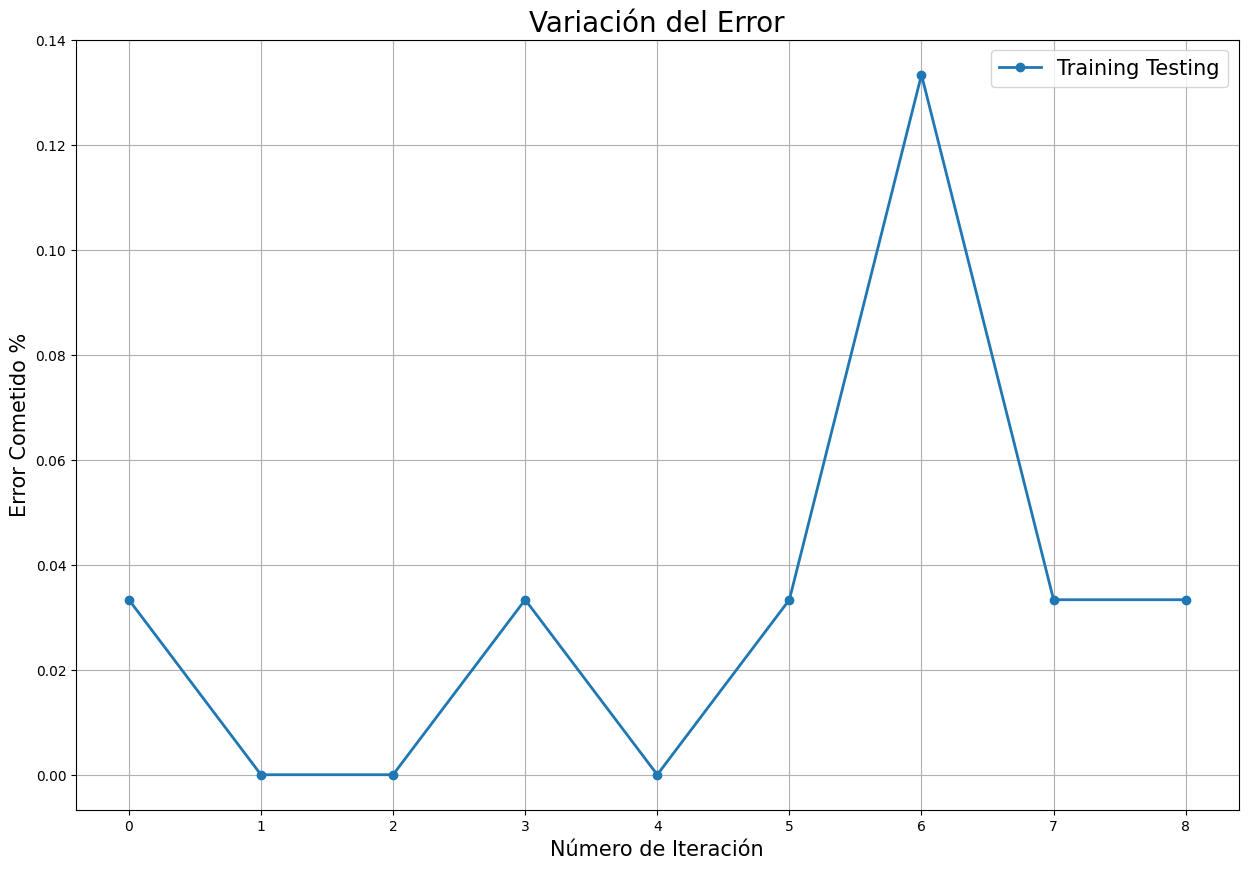

In [5]:
error_tt = []

for i in tqdm(range(0,9)):
    xTrain, xTest, yTrain, yTest = train_test_split(x,y, train_size=0.8)

    MLP_Classifier = MLPClassifier()
    MLP_Classifier.fit(xTrain,yTrain.iloc[:,0].values)
    error_tt.append(1 - MLP_Classifier.score(xTest, yTest))


plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw=2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing'], loc='upper right', fontsize=15)

PASO 5: Enfoque Tabla Completa (como tabla de training
y testing) para medir el error

El Enfoque de Tabla Completa en Machine Learning se refiere a una estrategia donde los datos de entrenamiento y prueba se organizan en una tabla completa, y el error del modelo se evalúa considerando todos los ejemplos disponibles.

  0%|          | 0/9 [00:00<?, ?it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 11%|█         | 1/9 [00:00<00:01,  4.53it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 22%|██▏       | 2/9 [00:00<00:01,  4.62it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
 33%|███▎      | 3/9 [00:00<00:01,  4.29it/s]c:\Users\JORGE\AppData\Local\Programs\Pyth

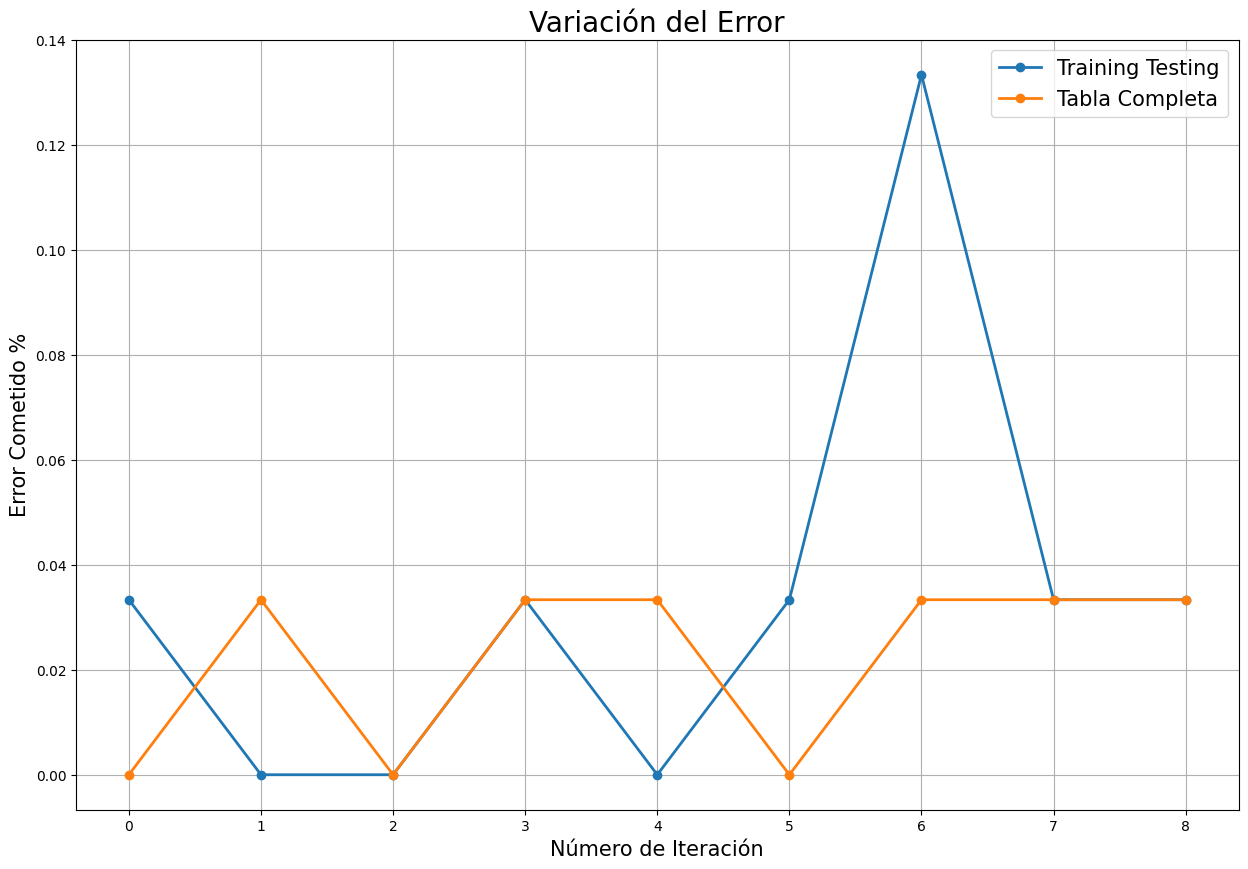

In [6]:
error_tc = []

for i in tqdm(range(0,9)):

    MLP_Classifier = MLPClassifier()
    MLP_Classifier.fit(x, y.values.ravel())

    error_tc.append(1 - MLP_Classifier.score(xTest, yTest))


plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw=2)
plt.plot(error_tc, 'o-', lw=2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing', 'Tabla Completa'], loc='upper right', fontsize=15)

PASO 6: LOOCV

In [7]:
error_LOOCV = []

LOOCV = LeaveOneOut()

for i in tqdm(range(0,9)):
    
    for train_ix, test_ix in LOOCV.split(x):
        X_train, X_test = x.iloc[train_ix, :], x.iloc[test_ix, :]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        MLP_Classifier = MLPClassifier()
        MLP_Classifier.fit(X_train, y_train.values.ravel())

    error_LOOCV.append(1 - MLP_Classifier.score(X_test, y_test))

  0%|          | 0/9 [00:00<?, ?it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum 

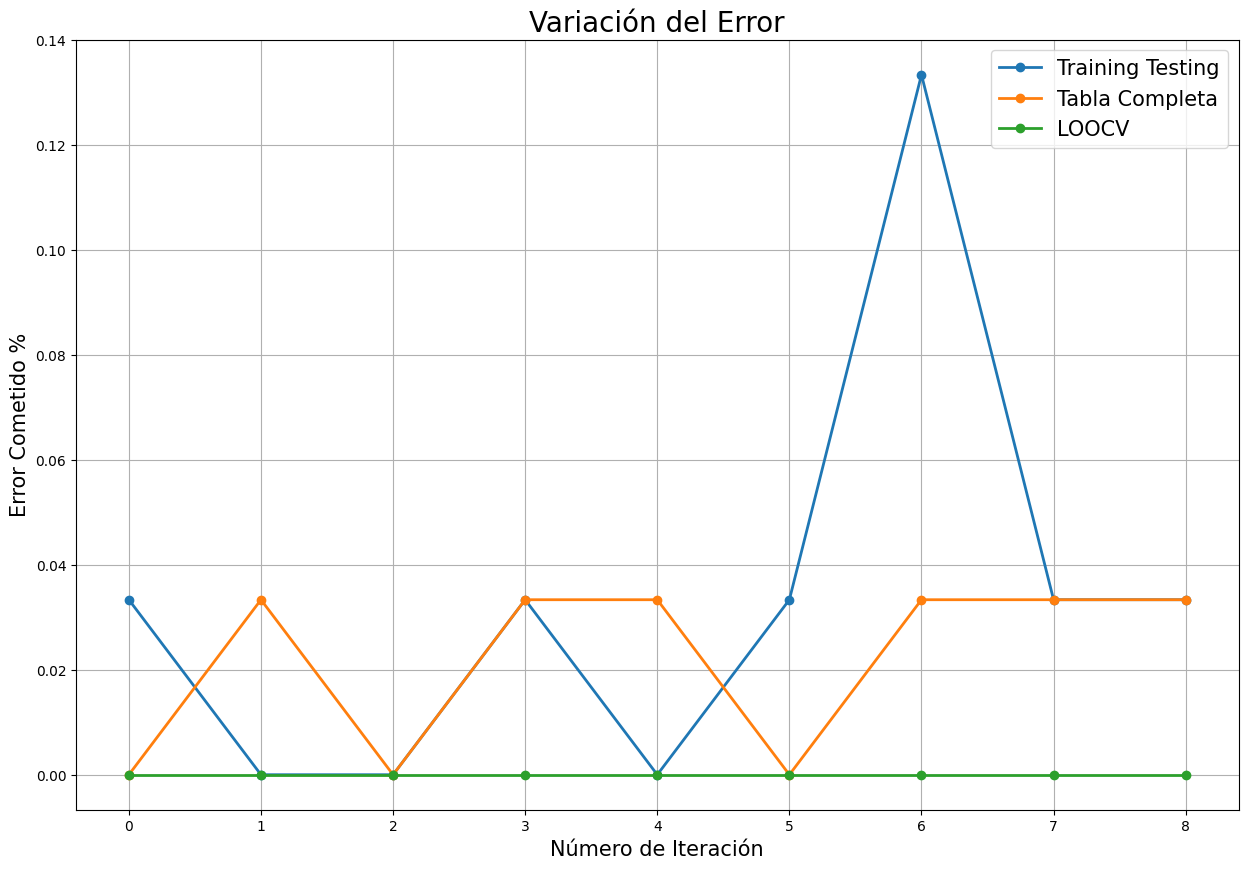

In [8]:
plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw=2)
plt.plot(error_tc, 'o-', lw=2)
plt.plot(error_LOOCV, 'o-', lw=2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing', 'Tabla Completa', 'LOOCV'], loc='upper right', fontsize=15)

In [9]:
from sklearn.model_selection import KFold

error_KFold = []

KFolds = KFold(n_splits=10)

for i in tqdm(range(0,9)):
	for train_ix, test_ix in KFolds.split(x):
		X_train, X_test = x.iloc[train_ix], x.iloc[test_ix]
		y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

		MLP_Classifier = MLPClassifier()
		MLP_Classifier.fit(X_train, y_train.values.ravel())
	error_KFold.append(1 - MLP_Classifier.score(X_test, y_test))


  0%|          | 0/9 [00:00<?, ?it/s]c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\JORGE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum 

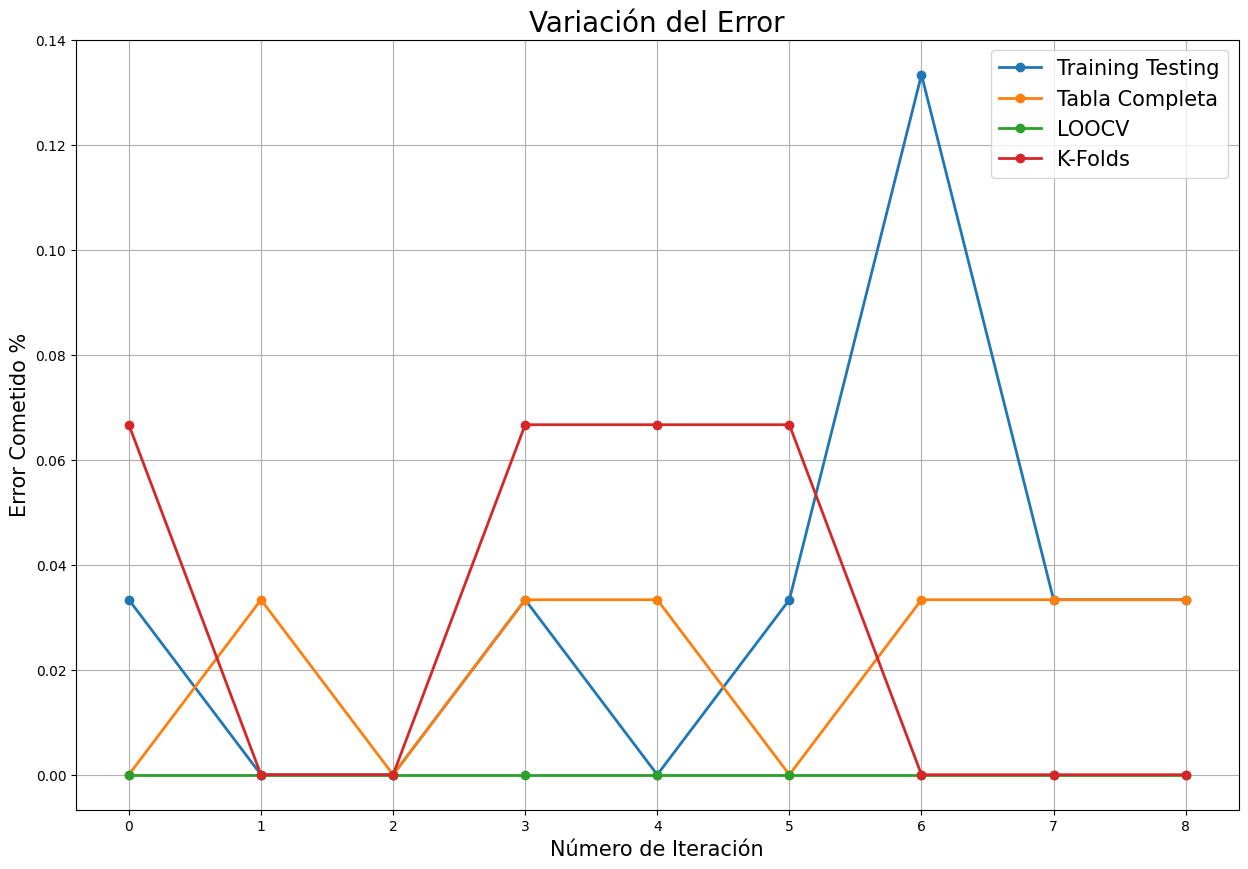

In [10]:
plt.figure(figsize=(15,10))
plt.plot(error_tt, 'o-', lw=2)
plt.plot(error_tc, 'o-', lw=2)
plt.plot(error_LOOCV, 'o-', lw=2)
plt.plot(error_KFold, 'o-', lw=2)
plt.xlabel("Número de Iteración", fontsize = 15)
plt.ylabel("Error Cometido %", fontsize = 15)
plt.title("Variación del Error", fontsize = 20)
plt.grid(True)
plt.legend(['Training Testing', 'Tabla Completa', 'LOOCV', 'K-Folds'], loc='upper right', fontsize=15)

#### Conclusiones.
En esta practica implementamos dos enfoques de entrenamiento: el enfoque Basado en Tabla de Aprendizaje y Tabla Testing (the validation test approach) y el enfoque Basado en utilizando una red neuronal con la técnica de propagación hacia atras (por sus siglas en el idioma Ingles NNBP). La red NNBP se implento utilizando la libreria de código abierto SCIKIT-LEARN.

#### Referencias.
[1] Machine Learning in Python, (2025). URL: https://scikit-
learn.org/stable/modules/generated/

[2] Oldemar Rodriguez (2025). Reporte Técnico de PROMIDAT: http://promidat.com/ (Ultimo acceso febrero 2025).